In [1]:
# From the video : https://www.youtube.com/watch?v=bqvZL8Ww3aA

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import statsmodels.api as sm

In [9]:
from pandas.plotting import autocorrelation_plot

In [10]:
# Loading the realtime NIFTY Data
from nsepy import get_history

In [13]:
import nsepy as nse

In [14]:
import datetime
from datetime import date

In [71]:
start = datetime.datetime(2000,1,1)
end = datetime.datetime(2008,1,1)

In [74]:
df = get_history('TATAMOTORS',start,end)

<AxesSubplot:xlabel='Date'>

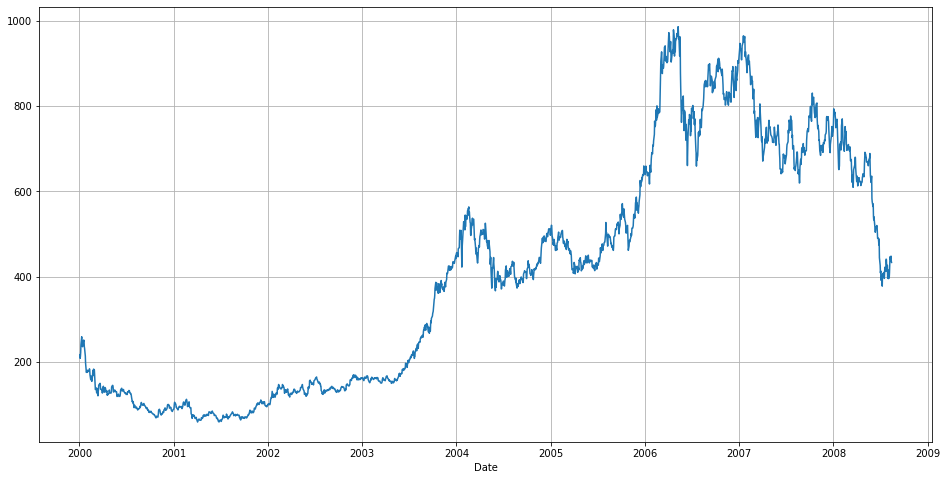

In [75]:
df['Close'].plot(figsize = (16,8), grid = 1)

In [76]:
tata_df = df['Close']

In [77]:
tata_df = tata_df.to_frame()

In [78]:
tata_df.index = pd.to_datetime(tata_df.index)

In [79]:
tata_Q = tata_df.resample('Q').mean() #Resampled into Quarterly Data

<AxesSubplot:xlabel='Date'>

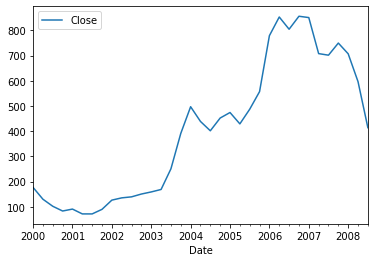

In [80]:
tata_Q.plot()

f:\python\lib\site-packages\pandas\plotting\_matplotlib\misc.py:411: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

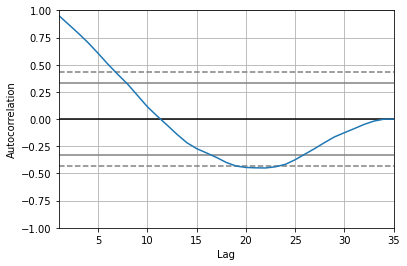

In [81]:
autocorrelation_plot(tata_Q)

In [ ]:
# From the ACF plot, it looks like p can something like 7

In [82]:
# Let's also plot using statsmodel
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

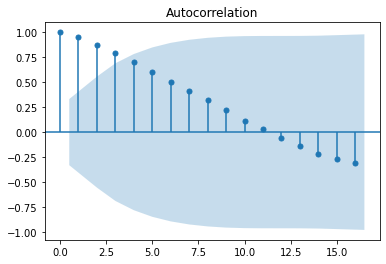

In [83]:
x = plot_acf(tata_Q)

In [57]:
from statsmodels.graphics.tsaplots import plot_pacf
# I forgot that I have called it above 

f:\python\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


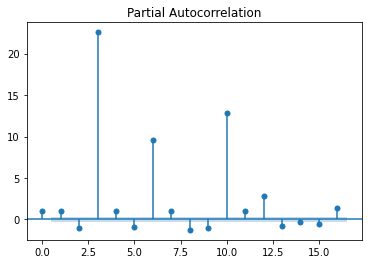

In [87]:
pacf_tata = plot_pacf(tata_Q, lags=16)

In [62]:
# No. of points outside critical range = 3 or 4
# Assume q = 3 or 4

In [64]:
from statsmodels.tsa.arima_model import ARIMA

In [110]:
tata_Q.head()

,Close
Date,
2000-03-31,177.003226
2000-06-30,130.192742
2000-09-30,102.231746
2000-12-31,83.422222
2001-03-31,91.119048


In [114]:
model = ARIMA(tata_Q, order = (7, 1, 4))

f:\python\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [112]:
model

In [115]:
model_fit = model.fit()

f:\python\lib\site-packages\statsmodels\tsa\tsatools.py:726: RuntimeWarning: divide by zero encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
f:\python\lib\site-packages\statsmodels\tsa\tsatools.py:726: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
f:\python\lib\site-packages\statsmodels\tsa\tsatools.py:728: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
f:\python\lib\site-packages\statsmodels\tsa\tsatools.py:728: RuntimeWarning: invalid value encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
f:\python\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
f:\python\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide

LinAlgError: SVD did not converge

<AxesSubplot:xlabel='Date'>

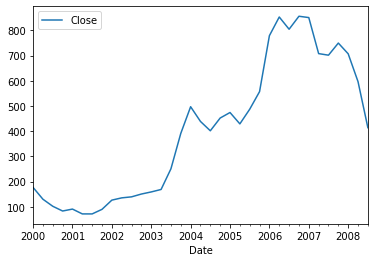

In [119]:
tata_Q.plot()

In [121]:
# Let's test if tata_Q is stationary or not by ADF Test

In [122]:
from statsmodels.tsa.stattools import adfuller
def adfcheck(timeseries):
    result = adfuller(timeseries)
    print('Augmented Dickey Fuller Test')
    print('----------------------------\n')
    labels = ['ADF Test Statistic', 'p-Value', '# of lags', 'Num of observations used']
    
    for value, label in zip(result,labels):
        print(label + ' : ' + str(value))
    # If p-Value <= 0.05, Stationary Data
    if result[1] <= 0.05:
        print('\nStrong evidence against Null Hypothesis')
        print('Reject Null Hypothesis')
        print('Data has no unit root and is Stationary')
    else:
        print('\nWeak evidence against Null Hypothesis')
        print('Failed to reject Null Hypothesis')
        print('Data has a unit root and is Non-Stationary')

In [125]:
adfcheck(tata_Q)

Augmented Dickey Fuller Test
----------------------------

ADF Test Statistic : -1.5417580645272575
p-Value : 0.5127624675834093
# of lags : 1
Num of observations used : 33

Weak evidence against Null Hypothesis
Failed to reject Null Hypothesis
Data has a unit root and is Non-Stationary


In [126]:
# Since the data is not stationary, We should make it first stationary by differencing 

In [129]:
tata_Q['1st diff'] = tata_Q['Close'] - tata_Q['Close'].shift(1)

In [133]:
adfcheck(tata_Q['1st diff'].dropna())

Augmented Dickey Fuller Test
----------------------------

ADF Test Statistic : -2.949838033006574
p-Value : 0.03985190974012617
# of lags : 0
Num of observations used : 33

Strong evidence against Null Hypothesis
Reject Null Hypothesis
Data has no unit root and is Stationary


In [135]:
# Now let's try to fit ARIMA model on tata_Q['1st diff']

f:\python\lib\site-packages\pandas\plotting\_matplotlib\misc.py:411: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

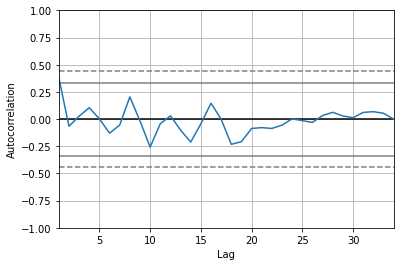

In [136]:
autocorrelation_plot(tata_Q['1st diff'].dropna())

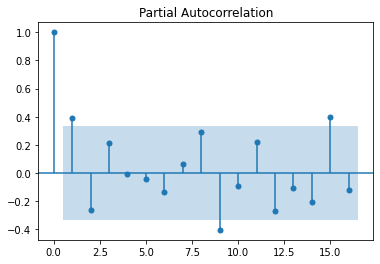

In [162]:
a = plot_pacf(tata_Q['1st diff'].dropna(), lags = 16)

In [146]:
model1 = ARIMA(tata_Q['1st diff'].dropna(), order = (0,0,1))

f:\python\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [147]:
m = model1.fit()

In [148]:
print(m.summary())

                              ARMA Model Results                              
Dep. Variable:               1st diff   No. Observations:                   34
Model:                     ARMA(0, 1)   Log Likelihood                -189.790
Method:                       css-mle   S.D. of innovations             63.830
Date:                Sun, 15 Aug 2021   AIC                            385.581
Time:                        01:56:03   BIC                            390.160
Sample:                    06-30-2000   HQIC                           387.142
                         - 09-30-2008                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.7558     17.459      0.215      0.830     -30.464      37.975
ma.L1.1st diff     0.6120      0.120      5.105      0.000       0.377       0.847
                                    

In [149]:
# To know model is right or not, we will do residual analysis

In [150]:
m.resid 

Date
2000-06-30    -50.566287
2000-09-30     -9.203266
2000-12-31    -17.454705
2001-03-31     14.264764
2001-06-30    -31.562356
2001-09-30     15.444972
2001-12-31      4.963293
2002-03-31     29.744642
2002-06-30    -12.968997
2002-09-30      8.221501
2002-12-31      2.368435
2003-03-31      3.143499
2003-06-30      4.090645
2003-09-30     75.766240
2003-12-31     90.216142
2004-03-31     46.929804
2004-06-30    -90.870738
2004-09-30     14.810424
2004-12-31     37.818131
2005-03-31     -5.044153
2005-06-30    -45.767389
2005-09-30     82.425057
2005-12-31     15.577446
2006-03-31    208.709018
2006-06-30    -57.388151
2006-09-30    -17.154816
2006-12-31     58.257121
2007-03-31    -44.701623
2007-06-30   -119.358745
2007-09-30     63.061646
2007-12-31      5.715419
2008-03-31    -49.807017
2008-06-30    -83.807024
2008-09-30   -135.064374
Freq: Q-DEC, dtype: float64

In [151]:
# Convert it into a DataFrame
m_resid = m.resid.to_frame()

In [153]:
m_resid.head()

,0
Date,
2000-06-30,-50.566287
2000-09-30,-9.203266
2000-12-31,-17.454705
2001-03-31,14.264764
2001-06-30,-31.562356


<AxesSubplot:xlabel='Date'>

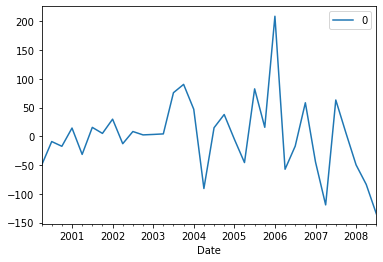

In [154]:
m_resid.plot()

<AxesSubplot:ylabel='Density'>

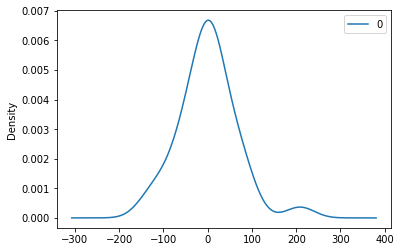

In [155]:
m_resid.plot(kind='kde')

In [157]:
m_resid.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,34.0,0.317899,64.958266,-135.064374,-41.416806,3.617072,26.202843,208.709018


In [163]:
# Mean is close to zero! So, this looks more or less good. But I'm still not satisfied. I need something concrete! 

In [164]:
# Let's try from https://www.kaggle.com/sumi25/understand-arima-and-tune-p-d-q

In [165]:
import warnings
warnings.filterwarnings('ignore')

In [166]:
import numpy as np
import pandas as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

In [182]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', parse_dates=True)

In [193]:
df['Month'] = df['Month'].apply(lambda x: '200'+ x if type(x)==str else np.NaN)

In [197]:
df['Month'] = pd.to_datetime(df.Month)

In [201]:
df = df.set_index('Month')

In [204]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sales,36.0,312.6,148.937164,119.3,192.45,280.15,411.1,682.0


In [205]:
df.head()

,Sales
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


<AxesSubplot:xlabel='Month'>

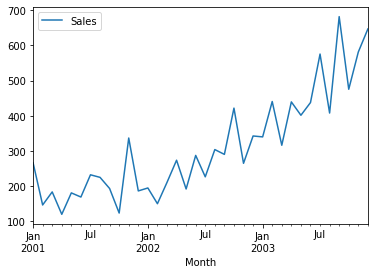

In [206]:
df.plot()

In [208]:
# Differencing. 
df['First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [210]:
adfcheck(df['First Difference'].dropna())

Augmented Dickey Fuller Test
----------------------------

ADF Test Statistic : -7.249074055553854
p-Value : 1.7998574141687034e-10
# of lags : 1
Num of observations used : 33

Strong evidence against Null Hypothesis
Reject Null Hypothesis
Data has no unit root and is Stationary


<AxesSubplot:xlabel='Month'>

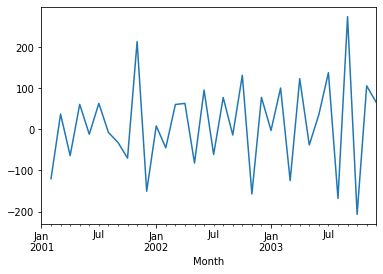

In [211]:
df['First Difference'].plot()

In [212]:
# Stationary in 1st difference!

In [213]:
# Let's decompose the TS (ETS)

In [217]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [218]:
result = seasonal_decompose(df['Sales'])

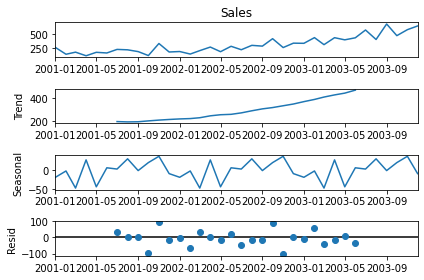

In [219]:
fig = result.plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

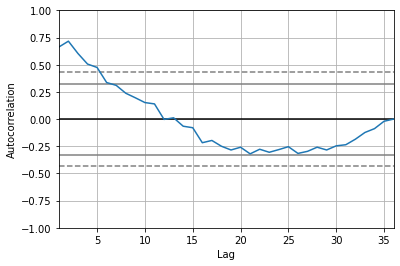

In [229]:
autocorrelation_plot(df['Sales'])

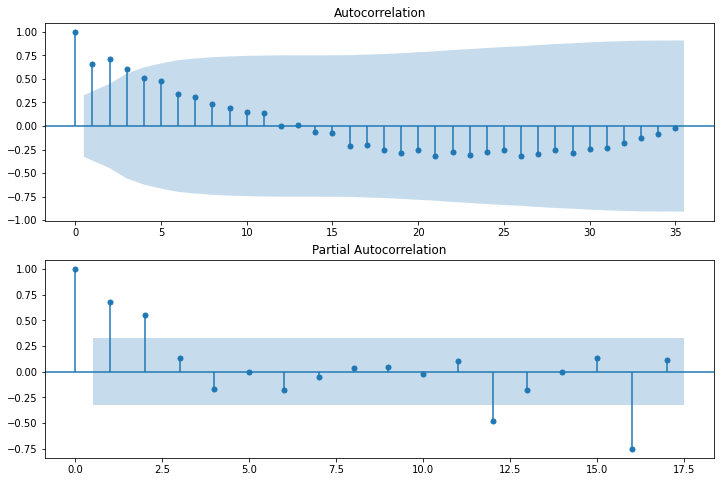

In [238]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.Sales, lags = 35, ax=ax1) #
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.Sales, lags= 17, ax=ax2)# , lags=40

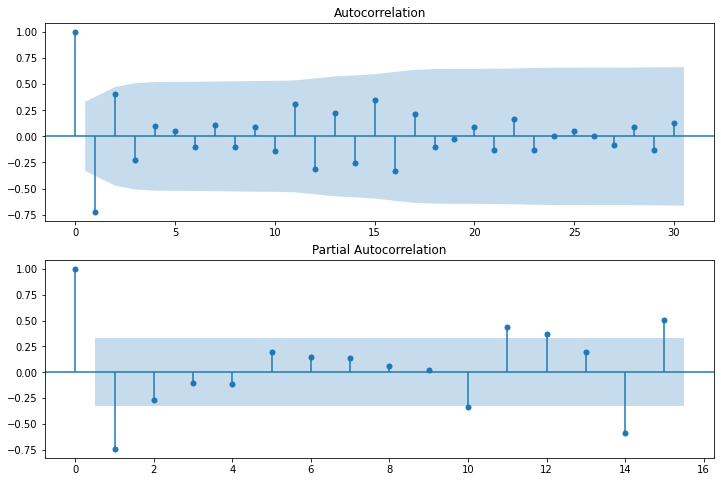

In [240]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['First Difference'].dropna(), lags = 30, ax=ax1) #
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['First Difference'].dropna(), lags= 15, ax=ax2)# , lags=40

In [242]:
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

AttributeError: module 'datetime' has no attribute 'strptime'

In [ ]:
# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)